# Predictive Analytics, Computer Vision & AI - CSC3831
## Coursework, Part 2: Machine Learning
## Sanjana Muppasani (22049243)

As this coursework is as much about practical skills as it is about reflecting on the procedures and the results, you are expected to explain what you did, your reasoning for process decisions, as well as a thorough analysis of your results.

### 1. Load the MNIST dataset, visualise the first 20 digits, and print their corresponding labels.

In [1]:
# Run this to load MNIST
import keras
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

In [2]:
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (70000, 28, 28)
Labels shape: (70000,)


Examining the feature shape of the dataset, we can see that this contains grayscale images where each emage is 28 x 28 pixels. There are 7000 images in the dataset. 

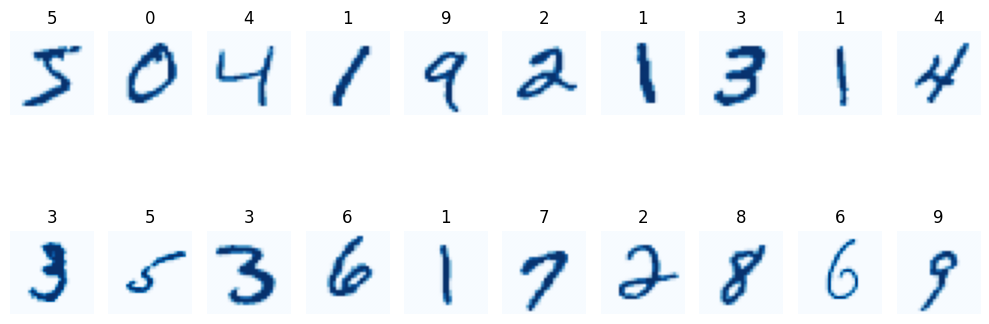

In [7]:
import matplotlib.pyplot as plt
import numpy as np

y = y.astype(int)

plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='Blues')
    plt.axis('off')
    plt.title(y[i])
plt.tight_layout()
plt.show()

Above is a visualization of the first 20 digits of the dataset with their corresponding class labels. The images are read in colour enhancing contrast. It is clearly evident that the images are individual handwritten units of different handwriting stypes that are easily distinguishable. 

### 2. Train a Logistic Regression classifier on this data, and report on your findings.

In [4]:
#checking for imbalances in the dataset to check if any pre processing needs to be done for the model
unique, counts = np.unique(y, return_counts=True)
print("Unique Values:", unique)
print("Counts:", counts)

Unique Values: [0 1 2 3 4 5 6 7 8 9]
Counts: [6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


The data needs to be checked for class imbalances to ensure the right approach for Machine Learning is used. Since the classes are balanced, there is no need to use advanced techniques like stratification or SMOTE oversampling. 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_flattened = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(
    X_flattened, y, test_size=0.2, random_state=42
)

The data has been split into train and test (80% and 20%) to ensure that the model has sufficient data for training and a hold out testset that can be used to test the model. Since the image size is already short and uniform, there is no need to further scale the data as this will also prove detrimental to PCA tasks. 

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(penalty='l1', C=0.1, solver='saga', max_iter=100, random_state=42)

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

c:\Users\sanja\AppData\Local\pypoetry\Cache\virtualenvs\cv-coursework1-5ricpFR8-py3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\sanja\AppData\Local\pypoetry\Cache\virtualenvs\cv-coursework1-5ricpFR8-py3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
c:\Users\sanja\AppData\Local\pypoetry\Cache\virtualenvs\cv-coursework1-5ricpFR8-py3.12\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The Logistic Regression model was trained on a 80%-sample subset of MNIST using the saga solver and L1 regularization ($C=0.1$) to ensure sparse weight vectors. Saga was specifically chosen over liblinear as it scales well to large datasets (such as MINST) While increasing max_iter from $100$ to $500$ boosted training accuracy (to $98.99\%$), it tripled the training time and slightly decreased test accuracy (from $90.2\%$ to $88.5\%$). Therefore, $100$ iterations were chosen as the optimal setting for efficiency and maximum generalization performance.

In [7]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.90      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.89      0.86      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.94      1503
           8       0.89      0.88      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



The Logistic Regression model achieved a strong overall accuracy of $92\%$ on the $14,000$ test samples, with the Macro and Weighted Averages also confirming a high, consistent performance ($\approx 0.92$) across all metrics (Precision, Recall, F1-score). This indicates a well-balanced dataset and effective generalization by the model.Performance was highest for digits '0' and '1', both achieving F1-scores of $0.96$. However, the model showed relative weakness in classifying digits '5' and '8', both registering the lowest F1-scores of $0.88$. Specifically, the lower Recall ($0.86$) for class '5' suggests the model frequently failed to identify true instances of the digit, resulting in $14\%$ of '5's being misclassified as other numbers.

Non-zero coefficients per class: [585 578 632 606 635 611 595 614 616 615]
Total Non-zero coefficients: 6087


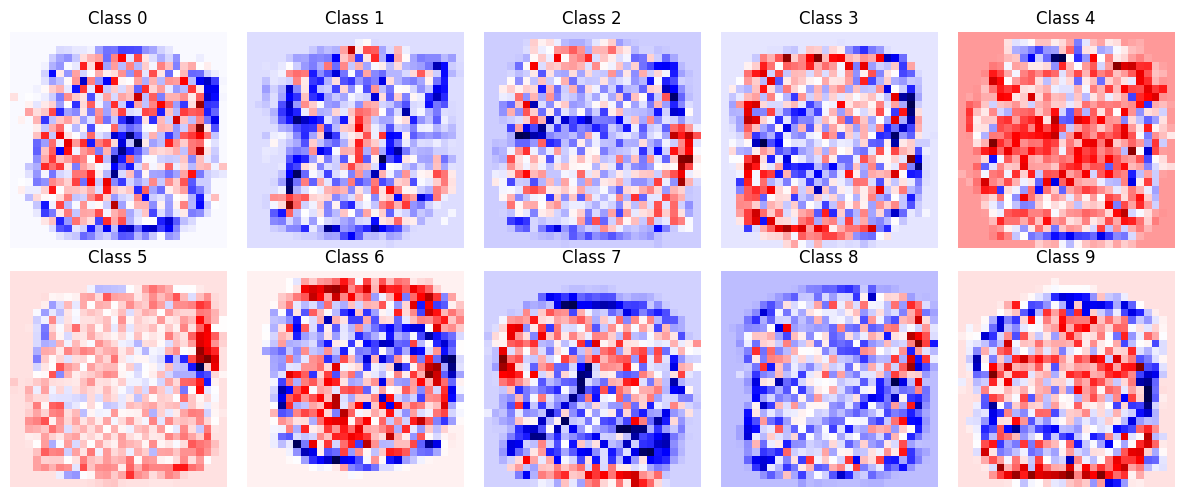

In [58]:
coef_matrix = lr.coef_
nonzero_per_class = np.count_nonzero(coef_matrix, axis=1)
print("Non-zero coefficients per class:", nonzero_per_class)
print("Total Non-zero coefficients:", np.count_nonzero(coef_matrix))

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for i in range(10):
    class_weights = coef_matrix[i].reshape(28, 28)
    axes[i].imshow(class_weights, cmap='seismic', interpolation='nearest')
    axes[i].axis('off')
    axes[i].set_title(f"Class {i}")

plt.tight_layout()
plt.show()

The plots, colored from red (positive coefficients indicating high probaility of belonging to a class) to blue (negative coefficients indicating low probability of belonging to a certain class), demonstrated that classification relies on a complex pattern of pixel activations and absences, not on any single isolated pixel. The L1 regularization was validated by the sparsity of the solution, which effectively highlighted only the most influential pixel regions. Specific classes show distinct influential areas; for instance, Class 0 and Class 7 rely on red (positive) signals in the center (in the shape of a circle and as a diagonal), while Class 1 relies on blue (negative) signals in surrounding areas. This confirmed that the model learned the geometric features that closely reflect handwriting variations. 

### 3. Use PCA to reduce the dimensionality of your training data.
    
1. Determine the number of components necessary to explain 80\% of the variance
2. Plot the explained variance by number of components.
3. Visualise the 20 principal components' loadings
4. Plot the two principal components for your data using a scatterplot, colouring by class. What can you say about this plot?
5. Visualise the first 20 digits, *generated from their lower-dimensional representation*.

In [5]:
from sklearn.decomposition import PCA 
pca = PCA()
pca.fit(X_train)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",None
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized S

The number of components required to explain 80% of the explained variance: 43


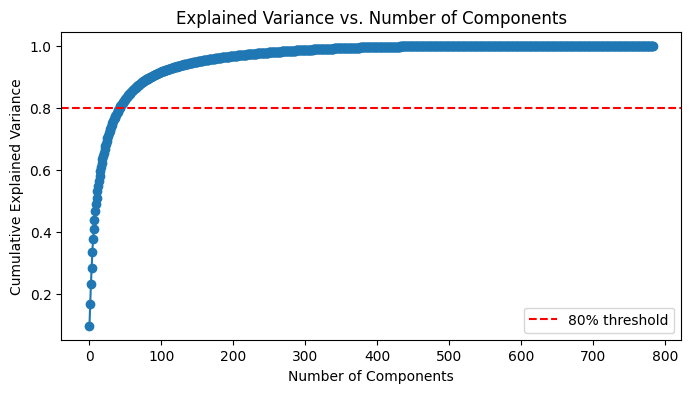

In [12]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_comps = np.searchsorted(cumulative_variance, 0.8) + 1

print(f"The number of components required to explain 80% of the explained variance:", num_comps)

plt.figure(figsize=(8,4))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.legend()


The above is a graph depicting Explained Variance compared to the number of components. As evidenced by the graph, there is a sharp increase in the cumilative variance for the roughly 50 components after which it stabilizes. The 80% threshold is roughly near the elbow point of the graph capturing most of the explained variance. This constitutes to the bulk of the image being processed and the rest of the variance captured the finer details (corners, edges and fine lines)

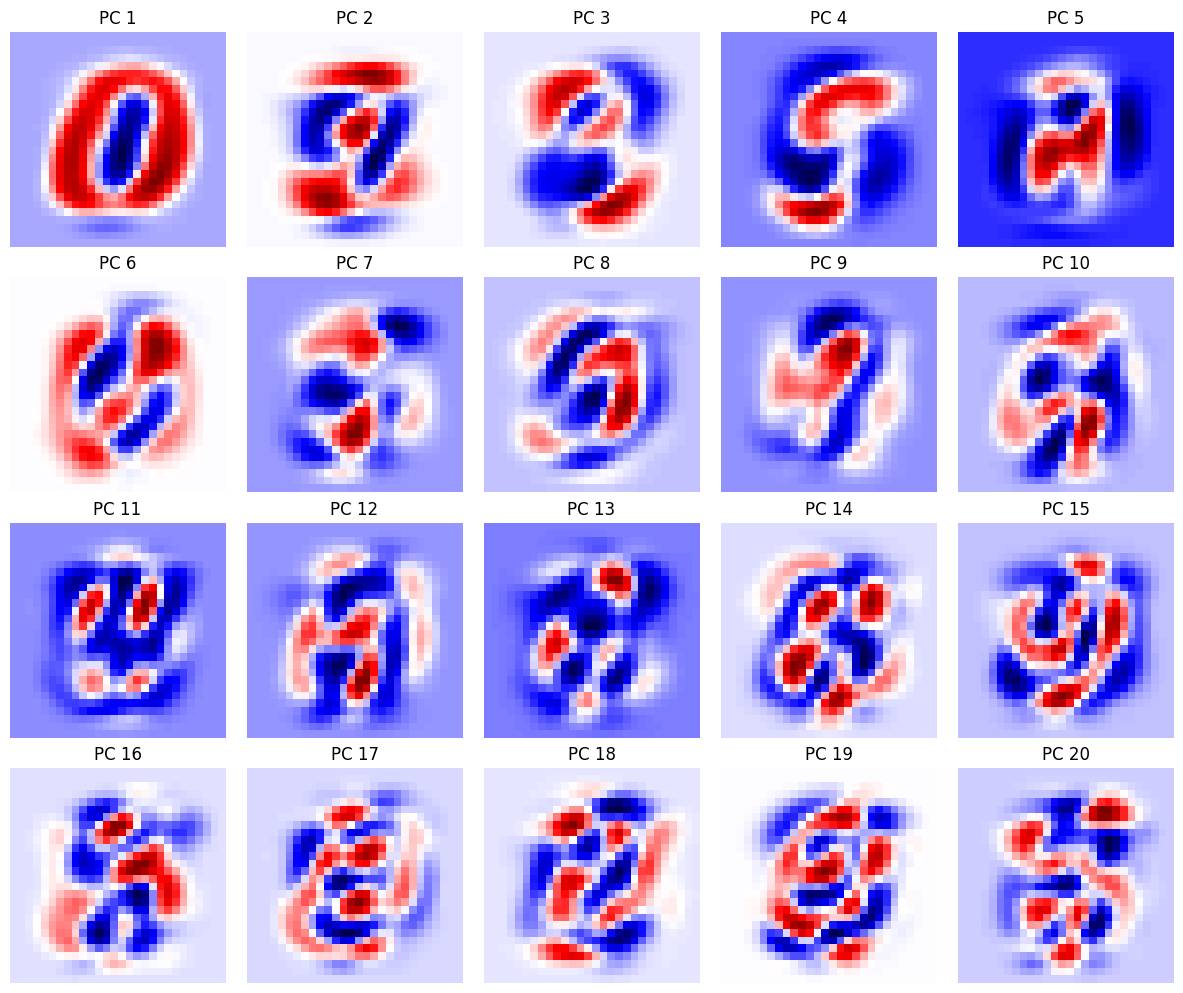

In [61]:
fig, axes = plt.subplots(4, 5, figsize=(12,10))
axes = axes.flatten()

for i in range(20):
    pc_image = pca.components_[i].reshape(28,28)
    axes[i].imshow(pc_image, cmap='seismic', interpolation='nearest')
    axes[i].axis('off')
    axes[i].set_title(f"PC {i+1}")

plt.tight_layout()
plt.show()

The visualization of the top 20 principal components as $28 \times 28$ pixel images illustrates how the model identifies the most significant structural variations within the dataset. These components act as abstract, blurry digit templates, where red and blue regions indicate pixel intensities that drive a data point’s coordinates in positive or negative directions along a specific component axis. The first few components (e.g., PC 1 through PC 5) capture broad, stroke-like features such as loops, outlines, and vertical orientations that define the primary differences between digits. In contrast, higher-indexed components represent more granular and less distinct patterns, focusing on refining finer distinctions and smaller details. This transition confirms that the PCA successfully decomposes the images into a hierarchy of features, ranging from large-scale structural shapes to subtle digit variations.

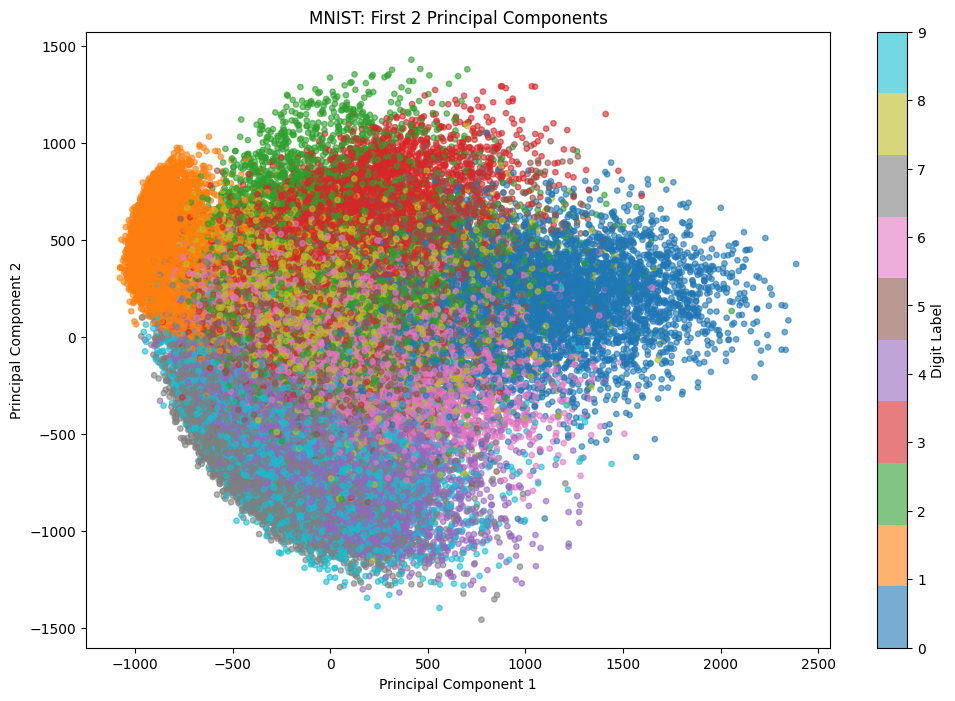

In [73]:
X_PCA = pca.fit_transform(X_train)
plt.figure(figsize=(12,8))
scatter = plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y_train, cmap='tab10', alpha=0.6, s=15)
plt.colorbar(scatter, label='Digit Label', ticks=range(10))
plt.title('MNIST: First 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The 2D projection of the MNIST dataset onto its first two principal components reveals that while PCA captures the data’s primary variance, two components are insufficient to resolve the complexity of ten distinct digit classes. The scatterplot shows considerable overlap, with no class forming an isolated cluster, demonstrating that the structural differences between digits are too subtle to be captured in a reduced two-dimensional space. However, the plot provides valuable insight into the data's variance, showing that certain classes cluster more tightly while others are more spread out. Ultimately, this visualization confirms that while PCA reveals the broader underlying structure of the handwriting data, higher-dimensional features are required for accurate multi-digit classification.

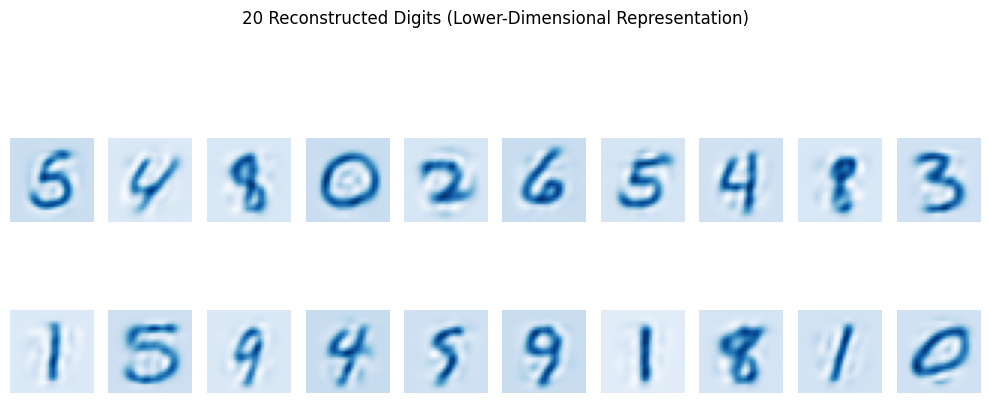

In [13]:
pca_80 = PCA(n_components=num_comps)
x_train_pca_80 = pca_80.fit_transform(X_train)

x_train_reconstructed = pca_80.inverse_transform(x_train_pca_80)

plt.figure(figsize=(10,5))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(x_train_reconstructed[i].reshape(28,28), cmap='Blues')
    plt.axis('off')
plt.suptitle("20 Reconstructed Digits (Lower-Dimensional Representation)")
plt.tight_layout()
plt.show()

PCA model with 43 components was used to project the original images into a lower-dimensional space and were then reconstructed back to their original 784 dimensional space. Visualizing the images shows that most of the quality was retained however the finer details such as the edges, and sharp lines are missing. However following on from the variance graph, this result is expected as the dimensions of the data have been drastically reduced. 

### 4. Generate a noisy copy of your data by adding random normal noise to the digits **with a scale that doesn't completely destroy the signal**. This is, the resulting images noise should be apparent, but the numbers should still be understandable.

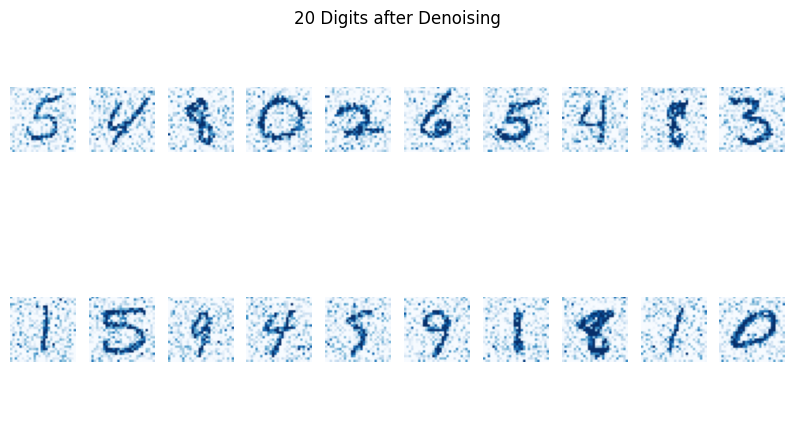

In [15]:
noise_factor = 80.0
X_train_noisy = X_train + np.random.normal(loc=0.0, scale=noise_factor, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0, 255)

n = 20 
plt.figure(figsize=(10,5))
plt.title("20 Digits after Denoising")
plt.axis("off")
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train_noisy[i].reshape(28,28), cmap='Blues')
    plt.axis('off')
plt.show()

Since the data is not scaled, a noise factor of 80 has been set (instead of a value between 0-1). This noise factor allows a certain degree of randomness to enter the image without fully distroying the pixels that act as the signal. The pictures have a level of granulatiry for this purpose however the numbers belonging to the different classes are clearly distinguishable. 

Number of components to retain ~65% variance: 21


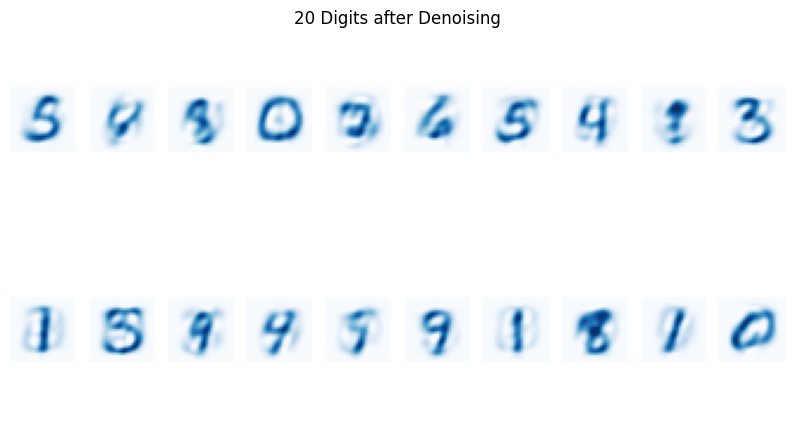

In [18]:
pca = PCA().fit(X_train)


cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_90 = np.searchsorted(cumulative_variance, 0.65) + 1
print(f"Number of components to retain ~65% variance: {num_components_90}")

pca_90 = PCA(n_components=num_components_90)
pca_90.fit(X_train)

X_train_noisy_pca = pca_90.transform(X_train_noisy)
X_train_noisy_denoised = pca_90.inverse_transform(X_train_noisy_pca)


X_train_noisy_denoised = np.clip(X_train_noisy_denoised, 0, 255)
plt.figure(figsize=(10,5))
plt.title("20 Digits after Denoising")
plt.axis("off")
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train_noisy_denoised[i].reshape(28,28), cmap='Blues')
    plt.axis('off')
plt.show()

Experimenting with different thresholds to analyse what is the minimum perecentage of components that I require to visualize the most of the dataset clearly, 65% is a strong contender. While increasing the thresold to 80 or 90% is effective, the number of components would be higher with more details however it is not an effective measure when trying to explore dimensionality reduction. Any threshold lower results in blurrier images where indicvidual numbers are unrecognizible and corrupted by the noise. 